___

# <font color= #f6c049> **Soda Pop Project: Data Processing** </font>
#### <font color= #2E9AFE> `Deep Learning`</font>
<Strong> Sofía Maldonado, Óscar Josué Rocha & Viviana Toledo </Strong>

_27/02/2026._

___

With our images obtained, we now continue to the preprocessing of said images. 

In [1]:
# Imports
# General Imports
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Data Processing
import tensorflow as tf
from tensorflow.python.client import device_lib
from keras.preprocessing import image_dataset_from_directory

2026-02-26 15:58:08.377700: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


The image normalization will make all images **(256,256)** in size.

In [3]:
img_size = 256

df = image_dataset_from_directory(
    directory="../data/external/", 
    image_size=(img_size, img_size),
    labels=None,
    label_mode=None)

df

Found 1627 files.


I0000 00:00:1772143090.516420    4421 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3534 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:09:00.0, compute capability: 7.5


<_PrefetchDataset element_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)>

Testing how images turn out

In [31]:
def show_image_subset(images):
    '''
    Show subset of 3 images from a certain dataset (use df.take to get a sample)
    '''
    test_images = images[0:3]

    plt.figure(figsize=(8,8))
    for i in range(len(test_images)):
        plt.subplot(1,3,i+1)
        plt.imshow(test_images[i].numpy().astype('uint8'))

    plt.show()

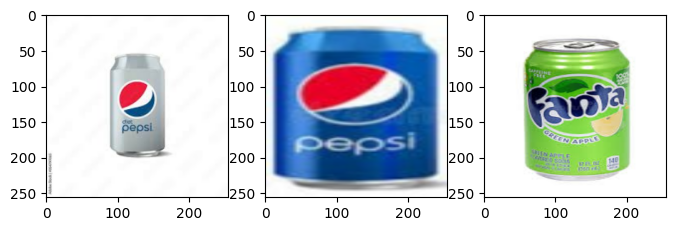

In [30]:
for i in df.take(1):
    images = i

show_image_subset(images)

In [ ]:
df = df.shuffle(buffer_size=1000,seed=42)

In [ ]:
total_batches = tf.data.experimental.cardinality(df).numpy()

train_batches = int(0.8*total_batches)
val_batches = int(0.1*total_batches)

train_ds = df.take(train_batches)
val_ds = df.skip(train_batches).take(val_batches)
test_ds = df.skip(train_batches+val_batches)

Finally, we save these to `../data/processed/` for use when modeling.

In [ ]:
train_ds.save('../data/processed/train_ds')
val_ds.save('../data/processed/val_ds')
test_ds.save('../data/processed/test.ds')

These can now be loaded in any other notebook with this code

```python
train_ds = tf.data.Dataset.load('../data/processed/train_ds')
val_ds = tf.data.Dataset.load('../data/processed/val_ds')
test_ds = tf.data.Dataset.load('../data/processed/test_ds')
```